
# Project: Investigate a Dataset of No-show appointments.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### This Report is about No-show appointments , (original source on Kaggle) .
>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment including :
PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood,Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show
>
### The Suggested questions are :
* 1- What is the effect of ( Age,Gender , SMS_received , Scholarship , Scheduled_Weekday) on  show up rate for their scheduled appointment?
* 2- What is the  top 10 Neighbourhood in no_show rate?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading the data 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#to see columns datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning as following:

>1-ScheduledDay,AppointmentDay need to be converted from object to Datetime

>2-weekday will be extracted from ScheduledDay,AppointmentDay to be used later

>3-Two coulmns will be dropped as they are not important 

>4-Some columns will be changed to anther appropriate names

>5-Check and update some  Age values

In [4]:

#check duplicates 
sum(df.duplicated())

0

In [5]:
#check null values 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### 1-ScheduledDay,AppointmentDay need to be converted from object to Datetime 

In [6]:
# convert ScheduledDay,AppointmentDay to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

#### 2-weekday will be extracted from ScheduledDay,AppointmentDay to be used later

In [7]:
#extract weekday from ScheduledDay,AppointmentDay
df['Scheduled_Weekday']=df['ScheduledDay'].dt.day_name()
df['Appointment_Weekday']=df['AppointmentDay'].dt.day_name()

#### 3-Two coulmns will be dropped as they are not important 

In [8]:
# these two coulmns will not be used 
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

#### 4-Some columns will be changed to anther appropriate names

In [9]:
#correct some columns name
df.rename(columns={'No-show': 'Noshow', 'Hipertension': 'Hypertension', 'Handcap': 'Handicap'},inplace=True)

#### 5-Check and update some  Age values

In [10]:
#check age range 
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [11]:
#drop negative age and age greater than 100 year
df.drop(df[df['Age'] < 0].index, inplace = True)
df.drop(df[df['Age'] > 100].index, inplace = True)

In [12]:
#check final structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 14 columns):
Gender                 110519 non-null object
ScheduledDay           110519 non-null datetime64[ns, UTC]
AppointmentDay         110519 non-null datetime64[ns, UTC]
Age                    110519 non-null int64
Neighbourhood          110519 non-null object
Scholarship            110519 non-null int64
Hypertension           110519 non-null int64
Diabetes               110519 non-null int64
Alcoholism             110519 non-null int64
Handicap               110519 non-null int64
SMS_received           110519 non-null int64
Noshow                 110519 non-null object
Scheduled_Weekday      110519 non-null object
Appointment_Weekday    110519 non-null object
dtypes: datetime64[ns, UTC](2), int64(7), object(5)
memory usage: 12.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Question1 : What is the effect of ( Age,Gender , SMS_received , Scholarship , Scheduled_Weekday) on  show up rate for their scheduled appointment?

Filtering the no show entries in a new DataFram called "df_noshow" to be used later

In [13]:
# select all data with no_show == yes to use in the analysis 
df_noshow = df[df['Noshow']=='Yes']

Filtering the show entries in a new DataFram called "df_show"

In [14]:
# select all data with no_show == No to use in the analysis 
df_show = df[df['Noshow']=='No']

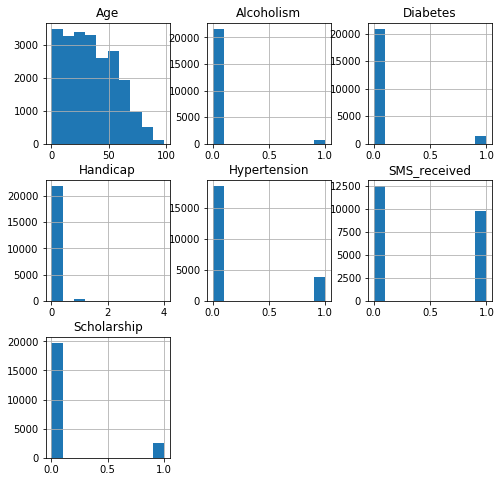

In [15]:
# to see some histograms with no_show patients
df_noshow.hist(figsize=(8,8));

#### Q1-1:The Age Factor with the no show rate

In [16]:
# to see the Age statistcs with the no_show entries .
df_noshow['Age'].describe()

count    22316.000000
mean        34.306820
std         21.947486
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max         98.000000
Name: Age, dtype: float64

To Find The correlation between the age and the no show rate : positive or negative Correlation??

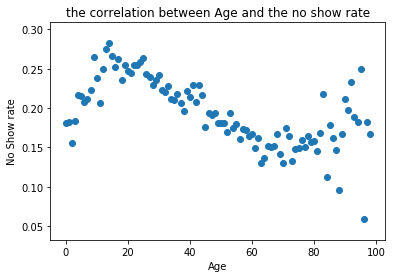

In [17]:
#to get the correlation between the age and the no show rate .

#Age_range in order
ind_age=df_noshow['Age'].value_counts().index.sort_values()

#no show rate with Age.
# to get the proportion is more applicable than the absolute count for detecting the no show rate 
Age_proportion_noshow=df_noshow['Age'].value_counts()[ind_age]/df['Age'].value_counts()[ind_age]

#scatter plot showing the Age Range and corresponding no show rate
plt.scatter(Age_proportion_noshow.index, Age_proportion_noshow)

# define a new function for reptitve code of assigen x_axis label, y_axis_label, title 
def plot_labels(ylabel,xlabel,tiltle):
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(tiltle)

plot_labels('No Show rate','Age','the correlation between Age and the no show rate')

It showed according to Age range the correlation differs as the following:
* Age range < 17 years has positive correlation.
* Age range between 17 and later 70's years has negative correlation .
* Age range above 80 years has almost positive correlation .

#### Q1-2: The Gender effect on the no show rate

In [18]:
#to show the aggregation of 'Noshow', 'Gender' 
Gender_count=df.groupby(['Noshow', 'Gender']).count()['ScheduledDay']
#to see the gender propotion with the no show index.
# to get the proportion is more applicable than the absolute count for detecting the no show rate 
Gender_total=df.groupby(['Gender']).count()['ScheduledDay']
gender_propotion=Gender_count/Gender_total
gender_propotion

Noshow  Gender
No      F         0.796873
        M         0.800321
Yes     F         0.203127
        M         0.199679
Name: ScheduledDay, dtype: float64

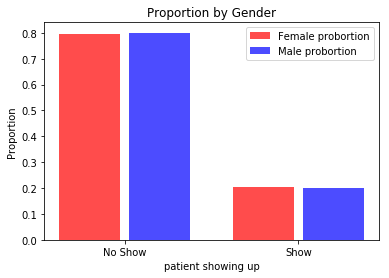

In [19]:
#to plot the gender propotion with the no show rate.
Gender_count=df.groupby([ 'Gender']).count()['ScheduledDay']

#to see the Female propotion with the no show index.
Gender_count_female=df[df['Gender']=='F'].groupby(['Noshow', 'Gender']).count()['ScheduledDay']/Gender_count[0]

#to see the male propotion with the no show index.
Gender_count_male=df[df['Gender']=='M'].groupby(['Noshow', 'Gender']).count()['ScheduledDay']/Gender_count[1]

# assign width of bars plot
width = 0.35 
x_axis = np.arange(2)
female_bars = plt.bar(x_axis -.2, Gender_count_female,width,  color='r', alpha=.7, label='Female probortion')
male_bars = plt.bar(x_axis +.2 , Gender_count_male,width,  color='b', alpha=.7, label='Male probortion')
plt.xticks(x_axis, ['No Show','Show'])
plot_labels('Proportion','patient showing up','Proportion by Gender')

# legend
plt.legend()



From the Graph , Gender has no effect on no show rate

#### Q1-3: The SMS_received effect on the no show rate

([<matplotlib.axis.XTick at 0x191c02365f8>,
 <a list of 2 Text xticklabel objects>)

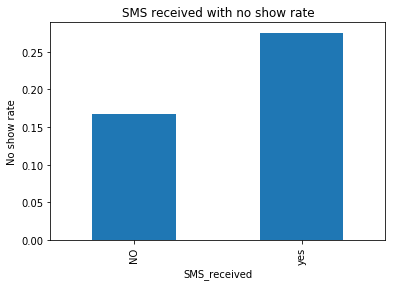

In [20]:
#to see SMS_received effect on the no show rate.

# to get the proportion is more applicable than the absolute count for detecting the no show rate 
SMS_received_proportion=df_noshow['SMS_received'].value_counts()/df['SMS_received'].value_counts()

SMS_received_proportion.plot(kind='bar');
plot_labels('No show rate','SMS_received','SMS received with no show rate')
plt.xticks([0,1], ['NO','yes'])

unexpected results !! , no show rate is lower in case of not sending an SMS

#### Q1-4:The Scholarship effect on the no show rate

([<matplotlib.axis.XTick at 0x191c018fdd8>,
 <a list of 2 Text xticklabel objects>)

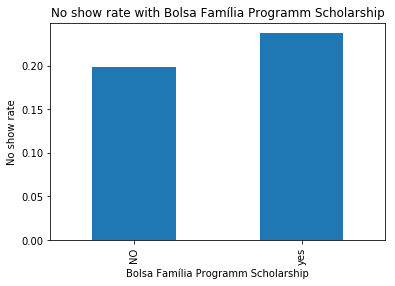

In [21]:
#to see the no show rate with Scholarship  .

# to get the proportion is more applicable than the absolute count for detecting the no show rate 
Scholarship_proportion=df_noshow['Scholarship'].value_counts()/df['Scholarship'].value_counts()
# to draw a bar graph
Scholarship_proportion.plot(kind='bar');
plot_labels('No show rate','Bolsa Família Programm Scholarship','No show rate with Bolsa Família Programm Scholarship')
plt.xticks([0,1], ['NO','yes'])

No show rate increased with this Scholarship 

#### Q1-5: The Scheduled_Weekday effect on the no show rate

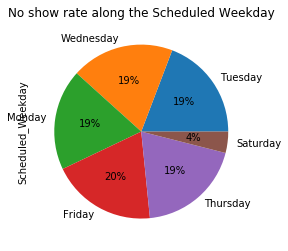

In [22]:
# to show no_show rate along the Scheduled_Weekday_that are extracted above . 
ind = df_noshow['Scheduled_Weekday'].value_counts().index

# to get the proportion is more applicable than the absolute count for detecting the no show rate. 
Scheduled=df_noshow['Scheduled_Weekday'].value_counts()[ind]/df['Scheduled_Weekday'].value_counts()[ind]

Scheduled.plot(kind='pie',autopct='%1.0f%%');
plt.title('No show rate along the Scheduled Weekday')
plt.show()

Saturday is the best day for commitment to schedules whith lowest no show rate , Friday is the worest 

###  Question2 : What is the  top 10 Neighbourhood in no_show rate?

ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289185
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
ITARARÉ                        0.262664
JESUS DE NAZARETH              0.243954
HORTO                          0.240000
ILHA DO PRÍNCIPE               0.234775
CARATOÍRA                      0.230409
ANDORINHAS                     0.229407
Name: Neighbourhood, dtype: float64


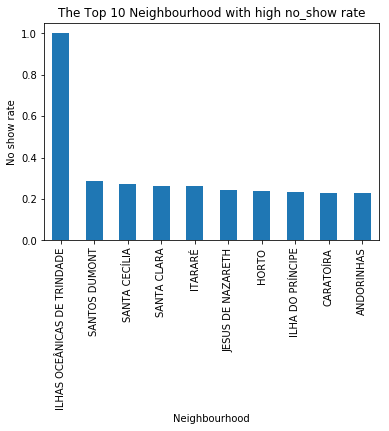

In [23]:

# to get the top 10 Neighbourhood in no_show rate

# get the ordered index 
ind2=df_noshow['Neighbourhood'].value_counts().index

# to get the proportion is more applicable than the absolute count for detecting the no show rate. 
Neighbourhood_proportion_noshow=df_noshow['Neighbourhood'].value_counts()[ind2]/df['Neighbourhood'].value_counts()[ind2]

# get the top 10 Neighbourhood with heighst no show rate
print(Neighbourhood_proportion_noshow.sort_values(ascending=False)[:10])

# show in a graph
Neighbourhood_proportion_noshow.sort_values(ascending=False)[:10].plot(kind='bar');
plot_labels('No show rate','Neighbourhood','The Top 10 Neighbourhood with high no_show rate')

To get the worest Neighbourhood in not commitment to schedules.

In [24]:
# to get hieghst Neighbourhood in no_show rate and it's value
Neighbourhood_proportion_noshow.max(),Neighbourhood_proportion_noshow.idxmax()

(1.0, 'ILHAS OCEÂNICAS DE TRINDADE')

<a id='conclusions'></a>
## Conclusions

### From the above investigation,  it showed that :
>1- Gender is not a major factor affecting No Show rate , Female proportion is almost the same as Male's.

>2- Age Factor : from the correlation between Age and the No show rate ,it showed that: 
      > - Ages less than 17 years have positive correlation , which means with increasing in age , thier commitment decreases and the no show rate increases to reach peak at 14 year.
      > - Ages between 17 to 80 years have negative correlation which means with increasing in age , thier commitment increases and the no show rate decreases .
       >- Ages above 80 years have almost positive correlation between age and no show rate
       
>3- SMS_received has unexpectedly slight negative effect on no show rate  

>4- members of Bolsa Família Programm Scholarship has higher no show rate than unsubscribed members.

>5- regarding Scheduled Weekday : Saturday has the least No show rate while Friday has the heighst No show rate.

>6- regarding Neighbourhood : 100 % of Scheduled appointment of "ILHAS OCEÂNICAS DE TRINDADE" has No show .<br>
    The heighst 10 Neighbourhood in no_show rate are :<br>
   * ILHAS OCEÂNICAS DE TRINDADE
   * SANTOS DUMONT         
   * SANTA CECÍLIA             
   * SANTA CLARA              
   * ITARARÉ                     
   * JESUS DE NAZARETH        
   * HORTO                    
   * ILHA DO PRÍNCIPE            
   * CARATOÍRA                    
   * ANDORINHAS   
   
### There may be some possible limitations in this study:
   * There are lack of some important information , like the name of service providers or the hospital names . That may help us find which of them correlated with high No show rate ? and suggest if thery need an improvments to keep more commitment of the patients .
   * There are some outliers that are removed , like entries with negative age or age more than 100 years.
   * This Analysis is about the effect of some factors on No show index only , But it would be better to find the interrelationship between other factors to give a better invistigation.
   
